<a href="https://colab.research.google.com/github/yh08037/ABR-Lab-Homework/blob/master/Crop_with_Annotation_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [0]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar

--2019-08-29 14:36:24--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  11.8MB/s    in 73s     

2019-08-29 14:37:38 (10.3 MB/s) - ‘images.tar’ saved [793579520/793579520]

--2019-08-29 14:37:40--  http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21852160 (21M) [application/x-tar]
Saving to: ‘annotation.tar’

annotation.tar      100%[===================>]  20.84M  5.38MB/s    in 3.9s    

2019-08-29 14:37:44 (5.38 MB/s) - ‘annotat

In [0]:
import tarfile

def tar_open(tarName):
    tar = tarfile.open(tarName)
    tar.extractall()
    tar.close()
    
tar_open("images.tar")
tar_open("annotation.tar")

In [0]:
import pathlib
data_root = pathlib.Path('/content/Images')
print(data_root)

/content/Images


In [0]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

image_count = len(all_image_paths)
image_count

20580

In [0]:
all_image_paths[:10]

['/content/Images/n02106550-Rottweiler/n02106550_11415.jpg',
 '/content/Images/n02088094-Afghan_hound/n02088094_5521.jpg',
 '/content/Images/n02091467-Norwegian_elkhound/n02091467_1885.jpg',
 '/content/Images/n02105855-Shetland_sheepdog/n02105855_2172.jpg',
 '/content/Images/n02099601-golden_retriever/n02099601_5.jpg',
 '/content/Images/n02096177-cairn/n02096177_1362.jpg',
 '/content/Images/n02106550-Rottweiler/n02106550_5271.jpg',
 '/content/Images/n02106662-German_shepherd/n02106662_9625.jpg',
 '/content/Images/n02096585-Boston_bull/n02096585_6567.jpg',
 '/content/Images/n02098413-Lhasa/n02098413_5409.jpg']

In [0]:
import re
import os
from PIL import Image

cropped_data_root = '/content/Cropped'

if not os.path.exists(cropped_data_root):
  os.mkdir(cropped_data_root) 

for path in all_image_paths:
  label = pathlib.Path(path).parent.name
  if not os.path.exists(cropped_data_root + '/' + label):
    os.mkdir(cropped_data_root + '/' + label)
  
  anno_path = path.replace('Images', 'Annotation')
  anno_path = anno_path.replace('.jpg', '')
  
  with open(anno_path, 'r') as f:
    while True:
      line = f.readline()
      if not line: break

      line = re.sub('[\t<>]', '', line)
      if 'xmin' in line: xmin = int(re.sub('[/a-zA-Z]', '', line))
      if 'ymin' in line: ymin = int(re.sub('[/a-zA-Z]', '', line))
      if 'xmax' in line: xmax = int(re.sub('[/a-zA-Z]', '', line))
      if 'ymax' in line: ymax = int(re.sub('[/a-zA-Z]', '', line))

  im = Image.open(path)
  crop_image = im.crop((xmin, ymin, xmax, ymax)).convert('RGB')
  if not os.path.exists(path.replace('Images', 'Cropped')):
    crop_image.save(path.replace('Images', 'Cropped'))

In [0]:
all_cropped_paths = list(pathlib.Path(crop_root).glob('*/*'))
all_cropped_paths = [str(path) for path in all_cropped_paths]
random.shuffle(all_cropped_paths)

cropped_count = len(all_cropped_paths)
cropped_count

20580

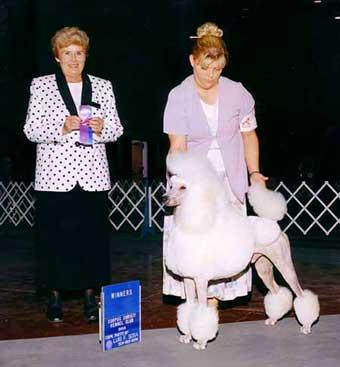

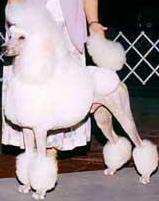

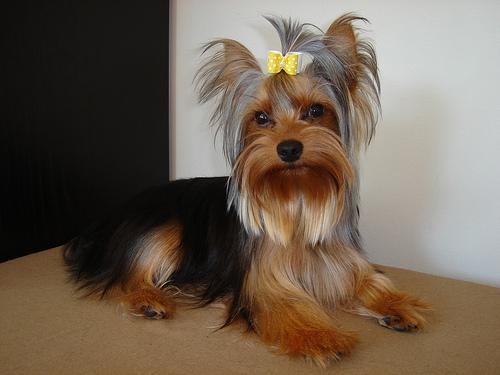

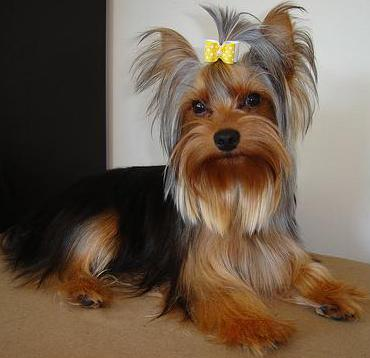

In [0]:
import IPython.display as display

for n in range(2):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    display.display(display.Image(image_path.replace('Images', 'Cropped')))
    print()

In [0]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_to_index = dict((name, index) for index, name in enumerate(label_names))

In [0]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [83, 9, 23, 79, 56, 41, 83, 84, 44, 53]
